In [2]:
from pathlib import Path
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np
import wandb
import torch
from torch import nn
import sys
sys.path.append(str(Path.cwd().parent))
from viz_utils import load_dfiv_model, predict_dfiv_model, load_dfiv_runs
import plotly.express as px
from src.data.demand_design_parcs_revise import psi, f

In [3]:

from IPython.display import display, HTML
import plotly
plotly.offline.init_notebook_mode(connected=True)

# The polling here is to ensure that plotly.js has already been loaded before
# setting display alignment in order to avoid a race condition.
display(HTML(
    '<script>'
        'var waitForPlotly = setInterval( function() {'
            'if( typeof(window.Plotly) !== "undefined" ){'
                'MathJax.Hub.Config({ SVG: { font: "STIX-Web" }, displayAlign: "center" });'
                'MathJax.Hub.Queue(["setRenderer", MathJax.Hub, "SVG"]);'
                'clearInterval(waitForPlotly);'
            '}}, 250 );'
    '</script>'
))

In [11]:
entity, project = "jasmineqy0", "formal_3"  
dup = 40
rho = 0.5

# Original

In [48]:
group = 'dfiv_low_dim_parcs_revise'
runs_df = load_dfiv_runs(entity, project, filters={'group' : group})
runs_df = runs_df[runs_df['state'].apply(lambda x: x == 'finished')]
runs_df = runs_df[runs_df['config'].apply(lambda x: x['data_configs']['data_size'] == 10000)]
runs_df = runs_df[runs_df['config'].apply(lambda x: x['data_configs']['rho'] == rho)]
print('Number of runs: ', len(runs_df))

Number of runs:  19


In [13]:
test_loss_idx = runs_df['summary'].apply(lambda x: True if 'test loss' in x else False)
test_loss_df = runs_df[test_loss_idx]
print('Number of runs with test loss: ', len(test_loss_df))

original_test_loss = test_loss_df['summary'].apply(lambda x: x['test loss'])

min_idx, min_test_loss = np.argmin(original_test_loss), np.min(original_test_loss)
print(f"min test loss: {min_test_loss}\n")

original_mean_test_loss = np.mean(original_test_loss)
print('mean test loss: ', original_mean_test_loss)

original_std_test_loss = np.std(original_test_loss)
print('std test loss: ', original_std_test_loss)

KeyError: 'summary'

In [14]:
best_run = runs_df.iloc[min_idx]
assert best_run['summary']['test loss'] == min_test_loss, 'min test loss not equal to min test loss in test loss df'
best_run_name, best_run_id = best_run['name'], best_run['id']
print(f'best run name: {best_run_name}, best run id: {best_run_id}')

run_path_original = '/'.join([entity, project, best_run_id])
print(f'best run path: {run_path_original}')

dfiv_original_model = load_dfiv_model(run_path_original)

IndexError: single positional indexer is out-of-bounds

In [15]:
original_test_rho = test_loss_df['config'].apply(lambda x: x['data_configs']['rho'])
# original_test_sigma = test_loss_df['config'].apply(lambda x: x['data_configs']['sigma'])
original_test_sigma = len(original_test_rho) * [0]

original_sigma_seq = np.unique(np.sort(original_test_sigma)).tolist()

df_original = pd.DataFrame({'sigma': original_test_sigma, 'rho': original_test_rho, 'test loss': original_test_loss})
df_original = df_original.groupby(['sigma', 'rho']).mean().reset_index()

KeyError: 'config'

# Mean 2

In [19]:
group = 'dfiv_low_dim_noise_price_mu'
runs_df = load_dfiv_runs(entity, project, filters={'group' : group})
runs_df = runs_df[runs_df['state'].apply(lambda x: x == 'finished')]
runs_df = runs_df[runs_df['config'].apply(lambda x: x['data_configs']['data_size'] == 10000)]
runs_df = runs_df[runs_df['config'].apply(lambda x: x['data_configs']['parcs_config'] == 'demand_noise_price_mu_2')]
print('Number of runs: ', len(runs_df))

Number of runs:  40


In [20]:
test_loss_idx = runs_df['summary'].apply(lambda x: True if 'min_test_loss' in x else False)
test_loss_df = runs_df[test_loss_idx]

mu_2_test_loss = test_loss_df['summary'].apply(lambda x: x['min_test_loss'])

min_idx, min_test_loss = np.argmin(mu_2_test_loss), np.min(mu_2_test_loss)
print(f"min test loss: {best_run['summary']['min_test_loss']}\n")

mu_2_mean_test_loss = np.mean(mu_2_test_loss)
print('mean test loss: ', mu_2_mean_test_loss)

mu_2_std_test_loss = np.std(mu_2_test_loss)
print('std test loss: ', mu_2_std_test_loss)

min test loss: 443.7384643554687

mean test loss:  13076.580750274657
std test loss:  29604.31458833736


In [21]:
best_run = runs_df.iloc[min_idx]
assert best_run['summary']['min_test_loss'] == min_test_loss, 'min test loss not equal to min test loss in test loss df'
best_run_name, best_run_id = best_run['name'], best_run['id']
print(f'best run name: {best_run_name}, best run id: {best_run_id}')

run_path_mu_2 = '/'.join([entity, project, best_run_id])
print(f'best run path: {run_path_mu_2}')

dfiv_hetero_mu_2_model = load_dfiv_model(run_path_mu_2)

best run name: eager-bee-235, best run id: w30styz2
best run path: jasmineqy0/formal_3/w30styz2


# Mean 4

In [22]:
group = 'dfiv_low_dim_noise_price_mu'
runs_df = load_dfiv_runs(entity, project, filters={'group' : group})
runs_df = runs_df[runs_df['state'].apply(lambda x: x == 'finished')]
runs_df = runs_df[runs_df['config'].apply(lambda x: x['data_configs']['data_size'] == 10000)]
runs_df = runs_df[runs_df['config'].apply(lambda x: x['data_configs']['parcs_config'] == 'demand_noise_price_mu_4')]
print('Number of runs: ', len(runs_df))

Number of runs:  40


In [23]:
test_loss_idx = runs_df['summary'].apply(lambda x: True if 'min_test_loss' in x else False)
test_loss_df = runs_df[test_loss_idx]

mu_4_test_loss = test_loss_df['summary'].apply(lambda x: x['min_test_loss'])

min_idx, min_test_loss = np.argmin(mu_4_test_loss), np.min(mu_4_test_loss)
print(f"min test loss: {best_run['summary']['min_test_loss']}\n")

mu_4_mean_test_loss = np.mean(mu_4_test_loss)
print('mean test loss: ', mu_4_mean_test_loss)

mu_4_std_test_loss = np.std(mu_4_test_loss)
print('std test loss: ', mu_4_std_test_loss)

min test loss: 340.1618957519531

mean test loss:  10283.643127441406
std test loss:  24808.820220057856


In [25]:
best_run = runs_df.iloc[min_idx]
assert best_run['summary']['min_test_loss'] == min_test_loss, 'min test loss not equal to min test loss in test loss df'
best_run_name, best_run_id = best_run['name'], best_run['id']
print(f'best run name: {best_run_name}, best run id: {best_run_id}')

run_path_mu_4 = '/'.join([entity, project, best_run_id])
print(f'best run path: {run_path_mu_4}')

dfiv_hetero_mu_4_model = load_dfiv_model(run_path_mu_4)

best run name: frosty-bee-308, best run id: uu0ik400
best run path: jasmineqy0/formal_3/uu0ik400


# Mean 8

In [26]:
group = 'dfiv_low_dim_noise_price_mu'
runs_df = load_dfiv_runs(entity, project, filters={'group' : group})
runs_df = runs_df[runs_df['state'].apply(lambda x: x == 'finished')]
runs_df = runs_df[runs_df['config'].apply(lambda x: x['data_configs']['data_size'] == 10000)]
runs_df = runs_df[runs_df['config'].apply(lambda x: x['data_configs']['parcs_config'] == 'demand_noise_price_mu_8')]
print('Number of runs: ', len(runs_df))

Number of runs:  40


In [27]:
test_loss_idx = runs_df['summary'].apply(lambda x: True if 'min_test_loss' in x else False)
test_loss_df = runs_df[test_loss_idx]

mu_8_test_loss = test_loss_df['summary'].apply(lambda x: x['min_test_loss'])

min_idx, min_test_loss = np.argmin(mu_8_test_loss), np.min(mu_8_test_loss)
print(f"min test loss: {best_run['summary']['min_test_loss']}\n")

mu_8_mean_test_loss = np.mean(mu_8_test_loss)
print('mean test loss: ', mu_8_mean_test_loss)

mu_8_std_test_loss = np.std(mu_8_test_loss)
print('std test loss: ', mu_8_std_test_loss)

min test loss: 344.242919921875

mean test loss:  3529.9064155578612
std test loss:  8872.570476937732


In [29]:
best_run = runs_df.iloc[min_idx]
assert best_run['summary']['min_test_loss'] == min_test_loss, 'min test loss not equal to min test loss in test loss df'
best_run_name, best_run_id = best_run['name'], best_run['id']
print(f'best run name: {best_run_name}, best run id: {best_run_id}')

run_path_mu_8 = '/'.join([entity, project, best_run_id])
print(f'best run path: {run_path_mu_8}')

dfiv_hetero_mu_8_model = load_dfiv_model(run_path_mu_8)

best run name: vocal-lake-580, best run id: 7j8cy9sh
best run path: jasmineqy0/formal_3/7j8cy9sh


# Mean 16

In [30]:
group = 'dfiv_low_dim_noise_price_mu'
runs_df = load_dfiv_runs(entity, project, filters={'group' : group})
runs_df = runs_df[runs_df['state'].apply(lambda x: x == 'finished')]
runs_df = runs_df[runs_df['config'].apply(lambda x: x['data_configs']['data_size'] == 10000)]
runs_df = runs_df[runs_df['config'].apply(lambda x: x['data_configs']['parcs_config'] == 'demand_noise_price_mu_16')]
print('Number of runs: ', len(runs_df))

Number of runs:  38


In [31]:
test_loss_idx = runs_df['summary'].apply(lambda x: True if 'min_test_loss' in x else False)
test_loss_df = runs_df[test_loss_idx]

mu_16_test_loss = test_loss_df['summary'].apply(lambda x: x['min_test_loss'])

min_idx, min_test_loss = np.argmin(mu_16_test_loss), np.min(mu_16_test_loss)
print(f"min test loss: {best_run['summary']['min_test_loss']}\n")

mu_16_mean_test_loss = np.mean(mu_16_test_loss)
print('mean test loss: ', mu_16_mean_test_loss)

mu_16_std_test_loss = np.std(mu_16_test_loss)
print('std test loss: ', mu_16_std_test_loss)

min test loss: 299.8954772949219

mean test loss:  641.1526047556024
std test loss:  298.03671023370043


In [32]:
best_run = runs_df.iloc[min_idx]
assert best_run['summary']['min_test_loss'] == min_test_loss, 'min test loss not equal to min test loss in test loss df'
best_run_name, best_run_id = best_run['name'], best_run['id']
print(f'best run name: {best_run_name}, best run id: {best_run_id}')

run_path_mu_16 = '/'.join([entity, project, best_run_id])
print(f'best run path: {run_path_mu_16}')

dfiv_hetero_mu_16_model = load_dfiv_model(run_path_mu_16)

best run name: honest-pond-818, best run id: a3vuzur2
best run path: jasmineqy0/formal_3/a3vuzur2


# CATE

In [33]:
num_point = 50

In [44]:
# vary t: fix p = 25, S = E[S]
emotion_range = np.array([1, 2, 3, 4, 5, 6, 7])
price_val = 25
price = np.ones(num_point) * price_val
time = np.linspace(0.0, 10, num_point)
emotion = (np.ones(num_point) * np.mean(emotion_range))
covariate = np.c_[time, emotion]

In [45]:
true_demand = f(price, time, emotion)

price = price[:, np.newaxis]
# original_demand = predict_dfiv_model(dfiv_original_model, price, covariate)
mu_2_pred_demand = predict_dfiv_model(dfiv_hetero_mu_2_model, price, covariate)
mu_4_pred_demand = predict_dfiv_model(dfiv_hetero_mu_4_model, price, covariate)
mu_8_pred_demand = predict_dfiv_model(dfiv_hetero_mu_8_model, price, covariate)
mu_16_pred_demand = predict_dfiv_model(dfiv_hetero_mu_16_model, price, covariate)

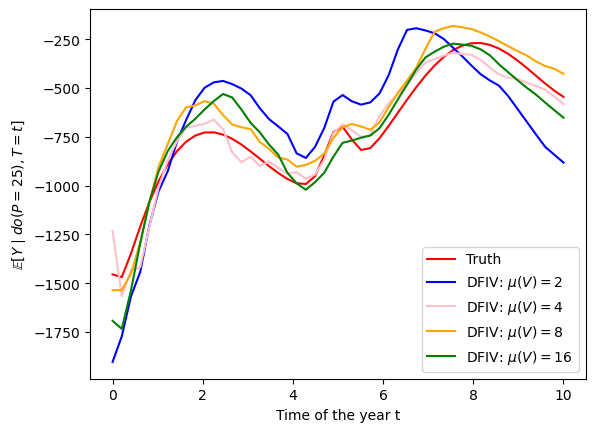

In [47]:
fig, ax = plt.subplots()
time = time.squeeze()
l1 = ax.plot(time, true_demand, color='red', label='Truth')
# l2 = ax.plot(time, original_demand, color='blue', label='DFIV: original')
l2 = ax.plot(time, mu_2_pred_demand, color='blue', label='DFIV: $\mu(V)=2$ ')
l3 = ax.plot(time, mu_4_pred_demand, color='pink', label='DFIV: $\mu(V)=4$ ')
l4 = ax.plot(time, mu_8_pred_demand, color='orange', label='DFIV: $\mu(V)=8$ ')
l5 = ax.plot(time, mu_16_pred_demand, color='green', label='DFIV: $\mu(V)=16$ ')
ax.legend()

ax.set_xlabel('Time of the year t')
ax.set_ylabel('$\mathbb{E}[Y\mid do(P=25), T=t]$')
plt.savefig(f'images/CATE_mean_mu.pdf')
plt.show()

# ATE

In [200]:
num_point = 50

In [38]:
# vary p: fix t = E[t] = 5, S = E[S] = 4
emotion_range = np.array([1, 2, 3, 4, 5, 6, 7])
price = np.ones(num_point) * np.linspace(10, 35, num_point)
time = np.linspace(0.0, 10, num_point)
emotion = (np.ones(num_point) * np.mean(emotion_range))
covariate = np.c_[time, emotion]

In [39]:
G = np.mean(psi(time)) * np.mean(emotion_range)
coef = G - 2
offset = 100 + 10 * G

true_demand = coef * price + offset

In [40]:
# # vary p: fix t = E[t] = 5, S = E[S] = 4
# emotion_range = np.array([1, 2, 3, 4, 5, 6, 7])
# price_val = np.linspace(10, 25, num_point)
# price = np.ones(num_point) * price_val
# time = np.array([5] * num_point)
# emotion = (np.ones(num_point) * np.mean(emotion_range))
# covariate = np.c_[time, emotion]

In [41]:
original_demand = []
for p in price:
    p = (np.ones(num_point) * p)[:, np.newaxis]
    pred = np.mean((predict_dfiv_model(dfiv_original_model, p, covariate)))
    original_demand.append(pred)

mu_2_pred_demand = []
for p in price:
    p = (np.ones(num_point) * p)[:, np.newaxis]
    pred = np.mean((predict_dfiv_model(dfiv_hetero_mu_2_model, p, covariate)))
    mu_2_pred_demand.append(pred)

mu_4_pred_demand = []
for p in price:
    p = (np.ones(num_point) * p)[:, np.newaxis]
    pred = np.mean((predict_dfiv_model(dfiv_hetero_mu_4_model, p, covariate)))
    mu_4_pred_demand.append(pred)
    
mu_8_pred_demand = []
for p in price:
    p = (np.ones(num_point) * p)[:, np.newaxis]
    pred = np.mean((predict_dfiv_model(dfiv_hetero_mu_8_model, p, covariate)))
    mu_8_pred_demand.append(pred)
    
mu_16_pred_demand = []
for p in price:
    p = (np.ones(num_point) * p)[:, np.newaxis]
    pred = np.mean((predict_dfiv_model(dfiv_hetero_mu_16_model, p, covariate)))
    mu_16_pred_demand.append(pred)

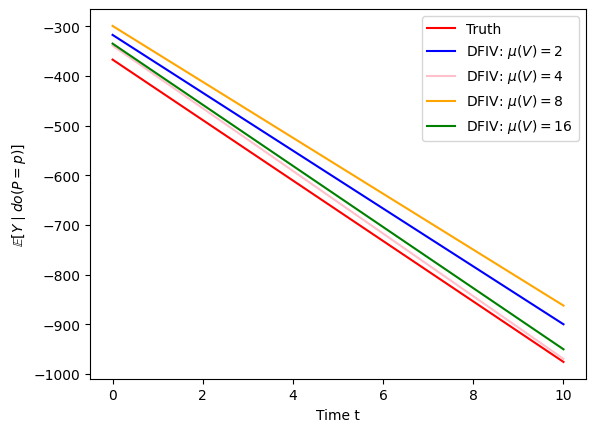

In [42]:
fig, ax = plt.subplots()
price = price.squeeze()
l1 = ax.plot(time, true_demand, color='red', label='Truth')
# l2 = ax.plot(time, original_demand, color='blue', label='DFIV: original')
l2 = ax.plot(time, mu_2_pred_demand, color='blue', label='DFIV: $\mu(V)=2$ ')
l3 = ax.plot(time, mu_4_pred_demand, color='pink', label='DFIV: $\mu(V)=4$ ')
l4 = ax.plot(time, mu_8_pred_demand, color='orange', label='DFIV: $\mu(V)=8$ ')
l5 = ax.plot(time, mu_16_pred_demand, color='green', label='DFIV: $\mu(V)=16$ ')

ax.legend()

ax.set_xlabel('Time t')
ax.set_ylabel('$\mathbb{E}[Y\mid do(P=p)]$')
plt.savefig(f'images/ATE_mean_mu.pdf')
plt.show()

# Average DFIV

In [206]:
mu = [0, 4, 8, 16]
test_mean_loss = [original_mean_test_loss, mu_4_mean_test_loss, mu_8_mean_test_loss, mu_16_mean_test_loss]
test_loss = [original_test_loss, mu_4_test_loss, mu_8_test_loss, mu_16_test_loss]

In [207]:
df_mean_loss = pd.DataFrame({'mu': mu, 'test_loss': test_mean_loss})
fig = px.bar(df_mean_loss, x='mu', y='test_loss',title='Test loss for different mean V',
             category_orders={'mu': mu})
fig.update_xaxes(type='category')
fig.show()

In [208]:
from itertools import chain

mu = [[i] * dup for i in mu]
mu = list(chain(*mu))
test_loss = np.hstack(test_loss)

df_loss = pd.DataFrame({'mu': mu, 'test_loss': test_loss})

In [209]:
fig = px.box(df_loss, x='mu', y='test_loss',title='Test loss for different V', log_y=True)
fig.update_xaxes(type='category')
fig.show()